In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neural_network
from sklearn import svm
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import metrics
from sklearn.decomposition import PCA
%matplotlib inline

In [3]:
dataL = pd.read_csv("https://raw.githubusercontent.com/ComputoCienciasUniandes/MetodosComputacionalesDatos/master/homework/2017-10/planetas/lowp_finalresults.csv")
dataH = pd.read_csv('https://raw.githubusercontent.com/ComputoCienciasUniandes/MetodosComputacionalesDatos/master/homework/2017-10/planetas/highp_finalresults.csv')

#varibales independientes: 
#numero de planetas:
Planetas_H = dataH.groupby(['ident']).size().get_values()
Planetas_L = dataL.groupby(['ident']).size().get_values()
#mas total de planetas
masa_H = dataH.groupby(['ident'])['emepla(i)/emet'].sum().get_values()
masa_L = dataL.groupby(['ident'])['emepla(i)/emet'].sum().get_values()
#eficiencia de masa: 
Em_H = masa_H/dataH.groupby(['ident'])['emed'].mean().get_values()
Em_L = masa_L/dataL.groupby(['ident'])['emed'].mean().get_values()
dataL.head()

,ident,it,t,a(i),emegas(i),emepla(i)/emet,rplanet(i)/radtie,emestar,rc,qest,sigmag_0,emed,gama,apert,fpert,constmigI,emetal,taugas
0,0,199992,20000001.0,0.026231,0.001185,1.710156,1.8388847169925493,4.368174e+32,59.88237,1.110726,51.287674,0.13,1.0,0.1,1.0,0.1,0.07707,9268935.0
1,0,199992,20000001.0,2.170653,0.000000,1.646707,1.8167126017756039,4.368174e+32,59.88237,1.110726,51.287674,0.13,1.0,0.1,1.0,0.1,0.07707,9268935.0
2,0,199992,20000001.0,4.251030,0.000000,1.059631,1.5688831343393115,4.368174e+32,59.88237,1.110726,51.287674,0.13,1.0,0.1,1.0,0.1,0.07707,9268935.0
3,0,199992,20000001.0,5.468018,0.000000,0.839156,1.4520602505243447,4.368174e+32,59.88237,1.110726,51.287674,0.13,1.0,0.1,1.0,0.1,0.07707,9268935.0
4,0,199992,20000001.0,8.935596,0.000000,0.367578,1.1032029110256696,4.368174e+32,59.88237,1.110726,51.287674,0.13,1.0,0.1,1.0,0.1,0.07707,9268935.0


In [4]:

X_L = dataL.drop(['emegas(i)','emepla(i)/emet'],inplace=False,axis=1).groupby(['ident']).mean()
X_H = dataH.drop(['emegas(i)','emepla(i)/emet'],inplace=False,axis=1).groupby(['ident']).mean()

scaler = preprocessing.StandardScaler().fit(X_H)
scaler.transform(X_H)

scaler = preprocessing.StandardScaler().fit(X_L)
scaler.transform(X_L)




array([[ 0.3167378 ,  0.        ,  2.09856586, ..., -1.04720195,
         0.39214288,  2.04063229],
       [ 0.26248232,  0.        , -0.77194317, ..., -1.04720195,
        -0.39885956, -0.19632769],
       [ 0.31690171,  0.        ,  2.49744347, ..., -1.04720195,
         2.43040056,  2.08794374],
       ..., 
       [-1.13597595,  0.        , -0.83510441, ..., -1.04720195,
        -0.14569369, -0.16222951],
       [ 0.3088153 ,  0.        ,  0.34193732, ..., -1.04720195,
        -0.76237153,  1.91942728],
       [ 0.31116473,  0.        ,  0.12942822, ..., -1.04720195,
         1.93418829,  1.43368431]])

In [5]:
XPH_train, XPH_test, YPH_train, YPH_test = train_test_split(X_H, Planetas_H)
XmH_train, XmH_test, YmH_train, YmH_test = train_test_split(X_H, masa_H)
XEH_train, XEH_test, YEH_train, YEH_test = train_test_split(X_H, Em_H)

In [6]:
XPL_train, XPL_test, YPL_train, YPL_test = train_test_split(X_L, Planetas_L)
XmL_train, XmL_test, YmL_train, YmL_test = train_test_split(X_L, masa_L)
XEL_train, XEL_test, YEL_train, YEL_test = train_test_split(X_L, Em_L)

In [7]:
def gauss(C,gamma,X_train,X_test,Y_train,Y_test):
    kernel_svr = svm.SVR(C=C, kernel='rbf', gamma=gamma)
    kernel_svr.fit(X_train,Y_train)
    rr=kernel_svr.predict(X_test)
    return rr

In [8]:
def solve_gauss(X_train,X_test,Y_train,Y_test):
    C=np.linspace(1000,10000,4)
    gamma=np.linspace(0.00001,1000,4)
    n=len(C)*len(gamma)
    plt.plot(Y_test,c='r')
    for i in range(len(C)):
        for j in range(len(gamma)):
            rr= gauss(C[i],gamma[j],X_train,X_test,Y_train,Y_test)
            plt.plot(rr)
   
    plt.show()

In [9]:
def lineal(C,X_train, X_test, Y_train, Y_test):
    linear_svr = svm.SVR(C=C, kernel='linear')
    linear_svr.fit(X_train,Y_train)
    rr=linear_svr.predict(X_test)
    return rr

In [10]:
def solve_linear(X_train, X_test, Y_train, Y_test):
    C=np.linspace(1,1000,16)
    plt.plot(Y_test)
    for i in range(len(C)):
        rr= lineal(C[i],X_train, X_test, Y_train, Y_test)
        plt.plot(rr)


In [11]:
from sklearn import tree
def trees(X_train, X_test, Y_train, Y_test,m):
    trees=tree.DecisionTreeRegressor(criterion=m)
    trees.fit(X_train, Y_train)
    y_pre=trees.predict(X_test)
    plt.plot(Y_test)
    plt.plot(y_pre)

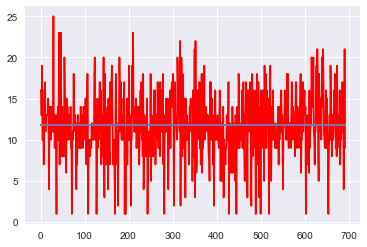

In [27]:
solve_gauss(XPH_train, XPH_test, YPH_train, YPH_test)

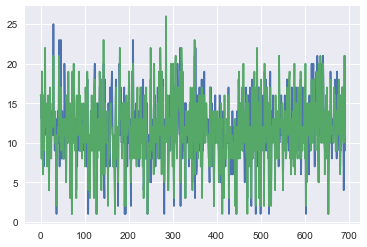

In [29]:
trees(XPH_train, XPH_test, YPH_train, YPH_test,'mae')

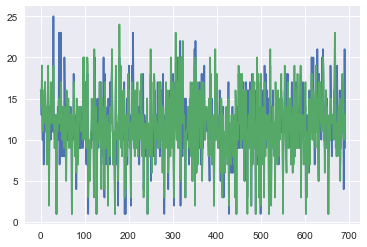

In [30]:
trees(XPH_train, XPH_test, YPH_train, YPH_test,'mse')

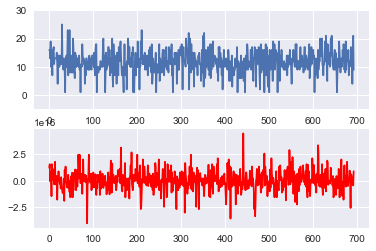

In [64]:
from sklearn import neural_network
neural=neural_network.MLPRegressor(hidden_layer_sizes=300, alpha=0.00000001)
neural.fit(XPH_train,YPH_train)
y=neural.predict(XPH_test)
plt.subplot(211)
plt.plot(YPH_test)
plt.ylim(-5,30)
plt.subplot(212)
plt.plot(y,c='r')
plt.show()

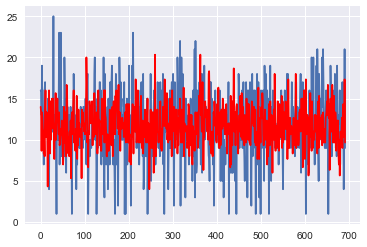

In [72]:
from sklearn import neighbors
nei=neighbors.KNeighborsRegressor(n_neighbors=3)
nei.fit(XPH_train,YPH_train)
ynei=nei.predict(XPH_test)
plt.plot(YPH_test)
plt.plot(ynei,c='r')
plt.show()

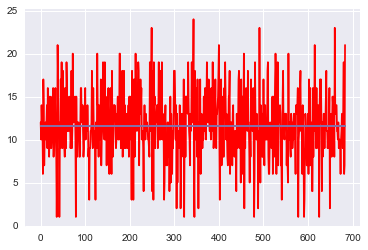

In [87]:
solve_gauss(XPL_train, XPL_test, YPL_train, YPL_test)

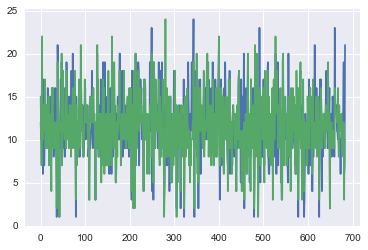

In [88]:
trees(XPL_train, XPL_test, YPL_train, YPL_test,'mae')

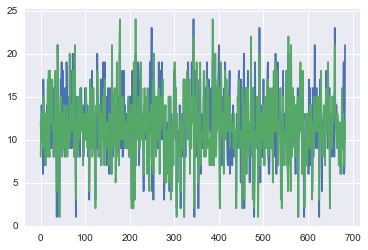

In [89]:
trees(XPL_train, XPL_test, YPL_train, YPL_test,'mse')

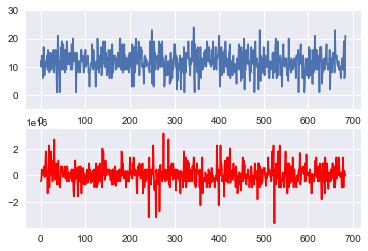

In [90]:
neural=neural_network.MLPRegressor(hidden_layer_sizes=300, alpha=0.00000001)
neural.fit(XPL_train,YPL_train)
y=neural.predict(XPL_test)
plt.subplot(211)
plt.plot(YPL_test)
plt.ylim(-5,30)
plt.subplot(212)
plt.plot(y,c='r')
plt.show()

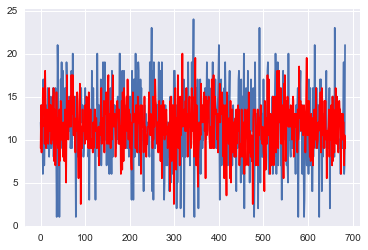

In [86]:
nei=neighbors.KNeighborsRegressor(n_neighbors=2)
nei.fit(XPL_train,YPL_train)
ynei=nei.predict(XPL_test)
plt.plot(YPL_test)
plt.plot(ynei,c='r')
plt.show()

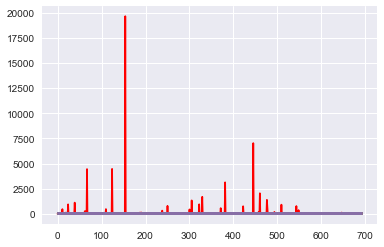

In [91]:
solve_gauss(XmH_train, XmH_test, YmH_train, YmH_test)

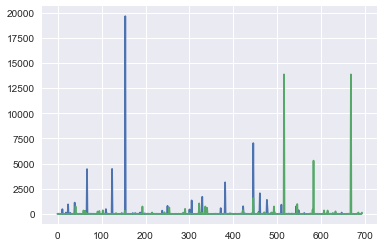

In [92]:
trees(XmH_train, XmH_test, YmH_train, YmH_test,'mae')

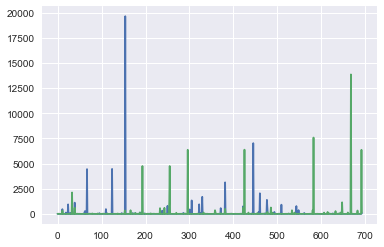

In [93]:
trees(XmH_train, XmH_test, YmH_train, YmH_test,'mse')

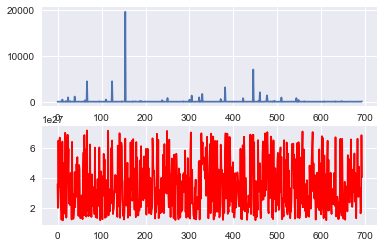

In [96]:
neural=neural_network.MLPRegressor(hidden_layer_sizes=300, alpha=0.001)
neural.fit(XmH_train,YmH_train)
y=neural.predict(XmH_test)
plt.subplot(211)
plt.plot(YmH_test)

plt.subplot(212)
plt.plot(y,c='r')
plt.show()

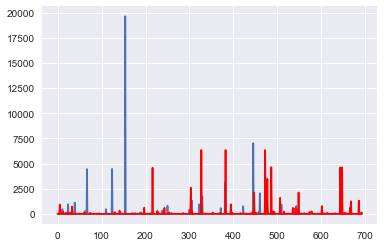

In [103]:
nei=neighbors.KNeighborsRegressor(n_neighbors=3)
nei.fit(XmH_train,YmH_train)
ynei=nei.predict(XmH_test)
plt.plot(YmH_test)
plt.plot(ynei,c='r')
plt.show()

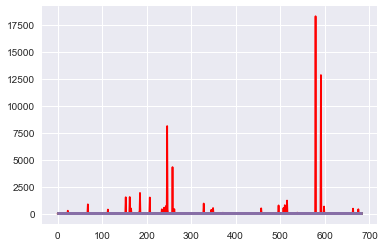

In [104]:
solve_gauss(XmL_train, XmL_test, YmL_train, YmL_test)

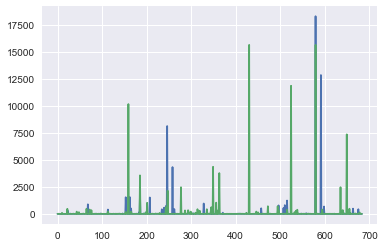

In [105]:
trees(XmL_train, XmL_test, YmL_train, YmL_test,'mae')

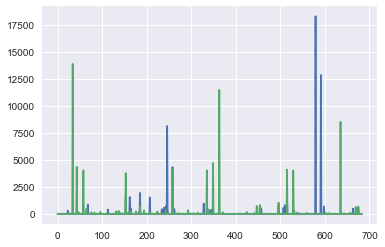

In [106]:
trees(XmL_train, XmL_test, YmL_train, YmL_test,'mse')

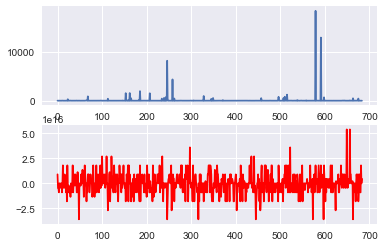

In [121]:
neural=neural_network.MLPRegressor(hidden_layer_sizes=300, alpha=0.00000001)
neural.fit(XmL_train,YmL_train)
y=neural.predict(XmL_test)
plt.subplot(211)
plt.plot(YmL_test)

plt.subplot(212)
plt.plot(y,c='r')
plt.show()

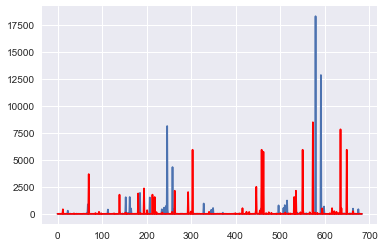

In [113]:
nei=neighbors.KNeighborsRegressor(n_neighbors=2)
nei.fit(XmL_train,YmL_train)
ynei=nei.predict(XmL_test)
plt.plot(YmL_test)
plt.plot(ynei,c='r')
plt.show()

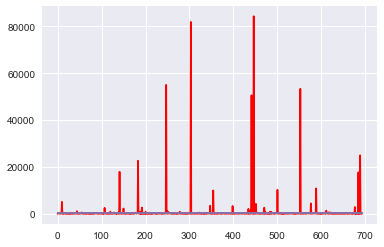

In [114]:
solve_gauss(XEH_train, XEH_test, YEH_train, YEH_test)

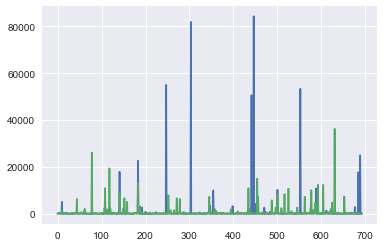

In [115]:
trees(XEH_train, XEH_test, YEH_train, YEH_test,'mae')

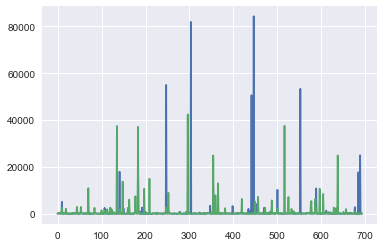

In [116]:
trees(XEH_train, XEH_test, YEH_train, YEH_test,'mse')

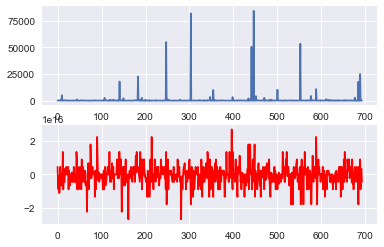

In [118]:
neural=neural_network.MLPRegressor(hidden_layer_sizes=300, alpha=0.00000001)
neural.fit(XEH_train,YEH_train)
y=neural.predict(XEH_test)
plt.subplot(211)
plt.plot(YEH_test)

plt.subplot(212)
plt.plot(y,c='r')
plt.show()

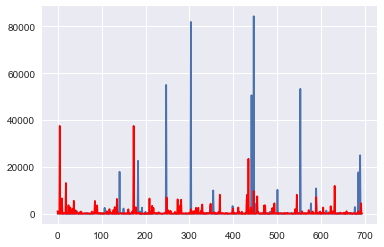

In [122]:
nei=neighbors.KNeighborsRegressor(n_neighbors=2)
nei.fit(XEH_train,YEH_train)
ynei=nei.predict(XEH_test)
plt.plot(YEH_test)
plt.plot(ynei,c='r')
plt.show()

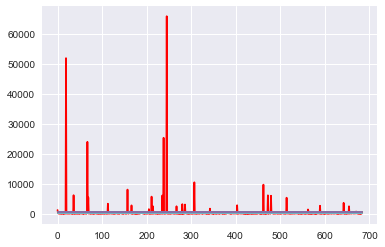

In [123]:
solve_gauss(XEL_train, XEL_test, YEL_train, YEL_test)

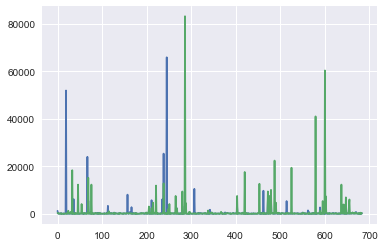

In [124]:
trees(XEL_train, XEL_test, YEL_train, YEL_test,'mae')

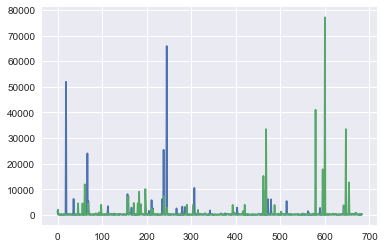

In [125]:
trees(XEL_train, XEL_test, YEL_train, YEL_test,'mse')

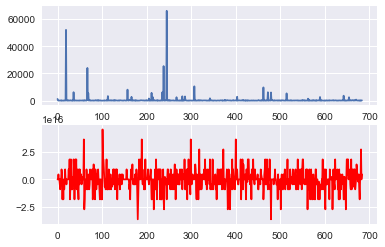

In [126]:
neural=neural_network.MLPRegressor(hidden_layer_sizes=300, alpha=0.00000001)
neural.fit(XEL_train,YEL_train)
y=neural.predict(XEL_test)
plt.subplot(211)
plt.plot(YEL_test)
plt.subplot(212)
plt.plot(y,c='r')
plt.show()

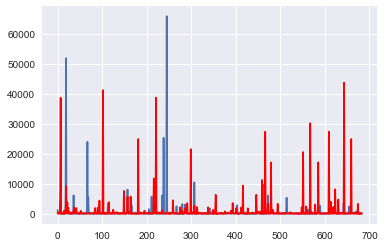

In [127]:
nei=neighbors.KNeighborsRegressor(n_neighbors=2)
nei.fit(XEL_train,YEL_train)
ynei=nei.predict(XEL_test)
plt.plot(YEL_test)
plt.plot(ynei,c='r')
plt.show()

In [38]:
def lasso(X_train,X_test, Y_train,b):
    clf = linear_model.Lasso(alpha=b)
    clf.fit(X_train, Y_train)
    Y_p=clf.predict(X_test)
    return (clf.coef_,Y_p)

#donde lo vayamos a poner

alphas = np.logspace(1e-3,1e2,5)
aciertos_t = 0

for i in range(len(alphas)):
    coef,Y_p = lasso(XPH_train,XPH_test, YPH_train, alphas[i])
    aciertos_i = 0
    for j in range(len(Y_p)):
        if(Y_p[i]-YPH_test[i] < 1):
            aciertos_i+=1
        if (aciertos_i > aciertos_t):
            aciertos_t = aciertos_i
            a = alphas[i]
    

In [63]:
cof1,Y1=lasso(XPH_train,XPH_test, YPH_train,0.000001)
cof2,Y2=lasso(XPH_train,XPH_test, YPH_train,0.0001)
cof3,Y3=lasso(XPH_train,XPH_test, YPH_train,0.01)
cof4,Y4=lasso(XPH_train,XPH_test, YPH_train,1)
cof5,Y5=lasso(XPH_train,XPH_test, YPH_train,100)
cof6,Y6=lasso(XPH_train,XPH_test, YPH_train,10000)

C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


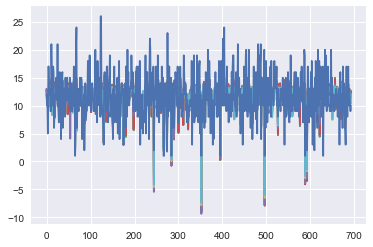

In [62]:
plt.plot(Y1)
plt.plot(Y2)
plt.plot(Y3)
plt.plot(Y4)
plt.plot(Y5)
plt.plot(Y6)
plt.plot(YPH_test)
plt.show()

In [66]:
print(cof1)
print(cof2)
print(cof3)
print(cof4)
print(cof5)
print(cof6)

[  1.17482153e-04   0.00000000e+00  -7.94526168e-01   3.93617186e-33
   1.49244785e-02   2.71924740e-03   5.97722296e-03   4.37222469e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   2.81461650e+00  -1.09477852e-07]
[  1.17541235e-04   0.00000000e+00  -7.90706309e-01   3.93553949e-33
   1.57413015e-02   2.42782934e-03   6.45500853e-03   3.71763477e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   2.79817762e+00  -1.10638633e-07]
[  1.19288493e-04   0.00000000e+00  -7.33062457e-01   3.76594228e-33
   1.95209082e-02   7.87793665e-03   7.53875795e-03   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   2.33513342e+00  -1.29368192e-07]
[  1.22382927e-04   0.00000000e+00  -1.04722543e-01   1.91074381e-33
  -0.00000000e+00   1.86718559e-02  -2.78040327e-02  -0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00  -3.35781528e-07]
[  1.09766740e-04   0.000000

In [67]:
cofm1,Ym1=lasso(XmH_train,XmH_test, YmH_train,0.000001)
cofm2,Ym2=lasso(XmH_train,XmH_test, YmH_train,0.0001)
cofm3,Ym3=lasso(XmH_train,XmH_test, YmH_train,0.01)
cofm4,Ym4=lasso(XmH_train,XmH_test, YmH_train,1)
cofm5,Ym5=lasso(XmH_train,XmH_test, YmH_train,100)
cofm6,Ym6=lasso(XmH_train,XmH_test, YmH_train,10000)

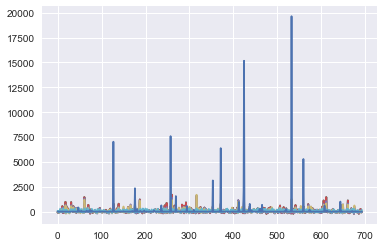

[ -2.27853163e-03   0.00000000e+00  -4.84986478e+01   1.32002058e-31
  -5.00845672e+00   5.51241740e+00  -1.81046427e+00   9.13209823e+03
   0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
   4.21060371e+02   7.02625073e-07]
[ -2.27847197e-03   0.00000000e+00  -4.84946321e+01   1.32000785e-31
  -5.00761422e+00   5.51213332e+00  -1.80995566e+00   9.13140590e+03
   0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
   4.21044314e+02   7.01362347e-07]
[ -2.27250533e-03   0.00000000e+00  -4.80930607e+01   1.31873555e-31
  -4.92336386e+00   5.48372559e+00  -1.75909552e+00   9.06217238e+03
   0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
   4.19438611e+02   5.75089662e-07]
[ -1.67908806e-03   0.00000000e+00  -7.95520615e+00   1.19267298e-31
   3.42475590e+00   2.63129901e+00   3.29137525e+00   2.16590743e+03
   0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
   2.58956343e+02  -1.20439478e-05]
[ -1.00277862e-03   0.000000

In [68]:
plt.plot(Ym1)
plt.plot(Ym2)
plt.plot(Ym3)
plt.plot(Ym4)
plt.plot(Ym5)
plt.plot(Ym6)
plt.plot(YmH_test)
plt.show()

print(cofm1)
print(cofm2)
print(cofm3)
print(cofm4)
print(cofm5)
print(cofm6)

In [70]:
cofE1,YE1=lasso(XEH_train,XEH_test, YEH_train,0.000001)
cofE2,YE2=lasso(XEH_train,XEH_test, YEH_train,0.0001)
cofE3,YE3=lasso(XEH_train,XEH_test, YEH_train,0.01)
cofE4,YE4=lasso(XEH_train,XEH_test, YEH_train,1)
cofE5,YE5=lasso(XEH_train,XEH_test, YEH_train,100)
cofE6,YE6=lasso(XEH_train,XEH_test, YEH_train,10000)

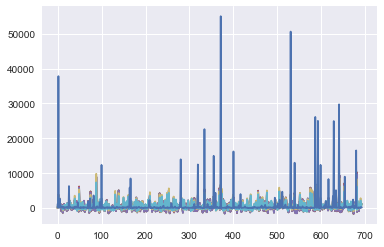

[ -1.73759519e-02   0.00000000e+00  -1.89850174e+02   2.03793829e-30
   4.56751972e+01  -2.61380900e+01   5.69186152e+01  -9.79424857e+03
   0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
   3.76141052e+03  -4.47693122e-05]
[ -1.73759823e-02   0.00000000e+00  -1.89853019e+02   2.03793577e-30
   4.56744010e+01  -2.61376440e+01   5.69181213e+01  -9.79361789e+03
   0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
   3.76141783e+03  -4.47683806e-05]
[ -1.73790230e-02   0.00000000e+00  -1.90137507e+02   2.03768360e-30
   4.55947831e+01  -2.60930445e+01   5.68687278e+01  -9.73054957e+03
   0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
   3.76214870e+03  -4.46752226e-05]
[ -1.76830871e-02   0.00000000e+00  -2.18586304e+02   2.01246655e-30
   3.76329907e+01  -2.16330993e+01   5.19293812e+01  -3.42371743e+03
   0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
   3.83523596e+03  -3.53594188e-05]
[ -5.03576689e-03   0.000000

In [71]:
plt.plot(YE1)
plt.plot(YE2)
plt.plot(YE3)
plt.plot(YE4)
plt.plot(YE5)
plt.plot(YE6)
plt.plot(YEH_test)
plt.show()

print(cofE1)
print(cofE2)
print(cofE3)
print(cofE4)
print(cofE5)
print(cofE6)

In [72]:
cofPL1,YPL1=lasso(XPL_train,XPL_test, YPL_train,0.000001)
cofPL2,YPL2=lasso(XPL_train,XPL_test, YPL_train,0.0001)
cofPL3,YPL3=lasso(XPL_train,XPL_test, YPL_train,0.01)
cofPL4,YPL4=lasso(XPL_train,XPL_test, YPL_train,1)
cofPL5,YPL5=lasso(XPL_train,XPL_test, YPL_train,100)
cofPL6,YPL6=lasso(XPL_train,XPL_test, YPL_train,10000)

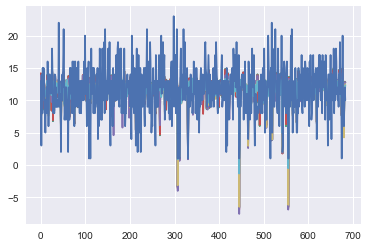

[  1.02171072e-04   0.00000000e+00  -7.87698389e-01   4.78897630e-33
   1.02082691e-02  -4.11882000e-02   4.89827480e-03   4.95006504e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   2.46455185e+00   2.90558429e-08]
[  1.02249667e-04   0.00000000e+00  -7.83099388e-01   4.78796902e-33
   1.12046402e-02  -4.15185164e-02   5.50423700e-03   4.13739522e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   2.44509279e+00   2.76991486e-08]
[  1.04352333e-04   0.00000000e+00  -7.17535698e-01   4.59404706e-33
   1.54173103e-02  -3.37160204e-02   6.77167239e-03   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   1.93924828e+00   7.87774653e-09]
[  1.08552759e-04   0.00000000e+00  -7.46197045e-02   2.66378109e-33
  -0.00000000e+00   0.00000000e+00  -2.66621998e-02  -0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
  -0.00000000e+00  -1.92986385e-07]
[  9.89700564e-05   0.000000

In [73]:
plt.plot(YPL1)
plt.plot(YPL2)
plt.plot(YPL3)
plt.plot(YPL4)
plt.plot(YPL5)
plt.plot(YPL6)
plt.plot(YPL_test)
plt.show()

print(cofPL1)
print(cofPL2)
print(cofPL3)
print(cofPL4)
print(cofPL5)
print(cofPL6)

In [74]:
cofmL1,YmL1=lasso(XmL_train,XmL_test, YmL_train,0.000001)
cofmL2,YmL2=lasso(XmL_train,XmL_test, YmL_train,0.0001)
cofmL3,YmL3=lasso(XmL_train,XmL_test, YmL_train,0.01)
cofmL4,YmL4=lasso(XmL_train,XmL_test, YmL_train,1)
cofmL5,YmL5=lasso(XmL_train,XmL_test, YmL_train,100)
cofmL6,YmL6=lasso(XmL_train,XmL_test, YmL_train,10000)

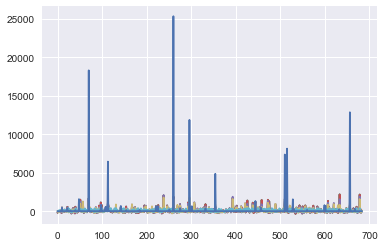

[ -2.05963107e-03   0.00000000e+00   1.40999209e+01  -2.01430772e-31
  -7.52012310e+00   2.25833533e+01  -4.96420302e+00   1.19489380e+04
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   3.00211639e+02  -1.63931059e-05]
[ -2.05956224e-03   0.00000000e+00   1.41039012e+01  -2.01430945e-31
  -7.51925964e+00   2.25830218e+01  -4.96369987e+00   1.19482526e+04
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   3.00194285e+02  -1.63942440e-05]
[ -2.05267906e-03   0.00000000e+00   1.45019325e+01  -2.01448264e-31
  -7.43291330e+00   2.25498702e+01  -4.91338484e+00   1.18797127e+04
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   2.98458876e+02  -1.65080558e-05]
[ -1.36845690e-03   0.00000000e+00   5.42630209e+01  -2.02992146e-31
   1.12403401e+00   1.92238442e+01   8.41642048e-02   5.05301463e+03
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   1.25168974e+02  -2.78758416e-05]
[ -1.71529451e-03   0.000000

In [75]:
plt.plot(YmL1)
plt.plot(YmL2)
plt.plot(YmL3)
plt.plot(YmL4)
plt.plot(YmL5)
plt.plot(YmL6)
plt.plot(YmL_test)
plt.show()

print(cofmL1)
print(cofmL2)
print(cofmL3)
print(cofmL4)
print(cofmL5)
print(cofmL6)

In [76]:
cofEL1,YEL1=lasso(XEL_train,XEL_test, YEL_train,0.000001)
cofEL2,YEL2=lasso(XEL_train,XEL_test, YEL_train,0.0001)
cofEL3,YEL3=lasso(XEL_train,XEL_test, YEL_train,0.01)
cofEL4,YEL4=lasso(XEL_train,XEL_test, YEL_train,1)
cofEL5,YEL5=lasso(XEL_train,XEL_test, YEL_train,100)
cofEL6,YEL6=lasso(XEL_train,XEL_test, YEL_train,10000)

C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


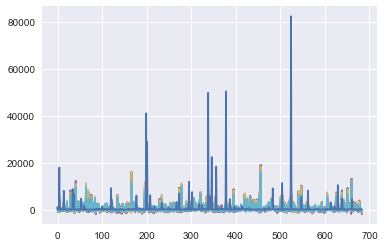

[ -1.26065798e-02   0.00000000e+00   1.50390101e+02  -2.00727816e-31
   4.41834836e+01   8.85364108e+01   5.94276340e+01  -2.83562911e+03
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   2.60492648e+03  -9.13002095e-05]
[ -1.26066158e-02   0.00000000e+00   1.50386779e+02  -2.00730343e-31
   4.41826705e+01   8.85369070e+01   5.94271342e+01  -2.83495835e+03
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   2.60493589e+03  -9.12992040e-05]
[ -1.26102157e-02   0.00000000e+00   1.50054532e+02  -2.00983131e-31
   4.41013608e+01   8.85865222e+01   5.93771583e+01  -2.76788238e+03
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   2.60587647e+03  -9.11986585e-05]
[ -1.26831579e-02   0.00000000e+00   1.37876885e+02  -2.18719648e-31
   4.07222803e+01   9.09876085e+01   5.72501083e+01  -0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   2.62497344e+03  -8.75355836e-05]
[ -2.79649815e-03   0.000000

In [77]:
plt.plot(YEL1)
plt.plot(YEL2)
plt.plot(YEL3)
plt.plot(YEL4)
plt.plot(YEL5)
plt.plot(YEL6)
plt.plot(YEL_test)
plt.show()

print(cofEL1)
print(cofEL2)
print(cofEL3)
print(cofEL4)
print(cofEL5)
print(cofEL6)